In [138]:
import pandas as pd
import re

df = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 3")

#dropping unnecessary information
df = df.drop(range(0,15))

#named each colums, will split them later (especially year and gender which is now combinded together)
df.columns=['Sort', 'Country/Area','Notes','Country Code','Data Type','1990b', '1995b', '2000b','2005b','2010b','2015b','1990m', '1995m', '2000m','2005m','2010m','2015m','1990f', '1995f', '2000f','2005f','2010f','2015f']

#droped three columns, will fix later if needed
df = df.drop('Notes', axis=1)
df = df.drop('Data Type', axis=1)
df = df.drop('Sort', axis=1)

#showing rows of current data frame
df.head(100)

,Country/Area,Country Code,1990b,1995b,2000b,2005b,2010b,2015b,1990m,1995m,2000m,2005m,2010m,2015m,1990f,1995f,2000f,2005f,2010f,2015f
15,WORLD,900,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,Developed regions,901,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,Developing regions,902,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,Least developed countries,941,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,Less developed regions excluding least develop...,934,1.617042,1.426534,1.386338,1.410133,1.631865,1.774158,1.700101,1.505273,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Timor-Leste,626,1.209622,1.137618,1.251439,1.14058,1.038953,0.914443,1.188375,1.100417,1.186075,1.11277,1.199725,1.061052,1.231375,1.175629,1.318672,1.169174,0.873043,0.763213
111,Viet Nam,704,0.041223,0.068168,0.07069,0.061479,0.069893,0.077897,0.045349,0.07607,0.082993,0.075009,0.082451,0.091224,0.037221,0.060493,0.058744,0.04835,0.057645,0.064852
112,Southern Asia,5501,1.634322,1.162882,1.052254,0.867864,0.841261,0.773663,1.727254,1.23096,1.123227,0.923635,0.906067,0.820059,1.535214,1.090271,0.9766,0.808369,0.772319,0.724392
113,Afghanistan,4,0.478025,0.426424,0.385328,0.357788,0.365658,1.175547,0.526843,0.450392,0.422292,0.390557,0.40166,1.153263,0.426785,0.400701,0.346076,0.322702,0.327609,1.199274


In [139]:
#splitting my dataframe #1 for regions


regionsDf = df[(df['Country Code'] == 901)|(df['Country Code'] == 902)|(df['Country Code'] == 941)|(df['Country Code'] == 934)] 

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
regionsDf = regionsDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="International migrant stock as a percentage of the total population")
regionsDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)
#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
regionsDf=(regionsDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

regionsDf.head(100)

,Regions,Country Code,International migrant stock as a percentage of the total population,Gender,Year
0,Developed regions,901,7.198015,b,1990
1,Developing regions,902,1.685021,b,1990
2,Least developed countries,941,2.171513,b,1990
3,Less developed regions excluding least develop...,934,1.617042,b,1990
4,Developed regions,901,7.891085,b,1995
...,...,...,...,...,...
67,Less developed regions excluding least develop...,934,1.432634,f,2010
68,Developed regions,901,11.348476,f,2015
69,Developing regions,902,1.49061,f,2015
70,Least developed countries,941,1.148865,f,2015


In [140]:
#splitting my dataframe #2 for Countries

#identifying the data I want to include for this table according to their country code
CountryDf = df[(df['Country Code'] <900)]

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
CountryDf = CountryDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="International migrant stock as a percentage of the total population")

#renaming the column to Countries
CountryDf.rename(columns={'Country/Area': 'Countries'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
CountryDf=(CountryDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

CountryDf.head(100)

,Countries,Country Code,International migrant stock as a percentage of the total population,Gender,Year
0,Burundi,108,5.934467,b,1990
1,Comoros,174,3.391353,b,1990
2,Djibouti,262,20.773307,b,1990
3,Eritrea,232,0.377435,b,1990
4,Ethiopia,231,2.404203,b,1990
...,...,...,...,...,...
95,Iraq,368,0.478521,b,1990
96,Israel,376,36.289077,b,1990
97,Jordan,400,34.133245,b,1990
98,Kuwait,414,52.184491,b,1990


In [141]:
#splitting my dataframe #3 for Area of Destination

#Identifying the parameters I want to include in this data, sorting them according to country codes
AreaDf = df[((df['Country Code'] > 903) & (df['Country Code']< 954))|(df['Country Code']== 5501)|(df['Country Code']== 5500)]

#Because some of the areas includes regions between 903 to 954, I want to exclude the regions in here so I am using a function including the "not equal to "
AreaDf = AreaDf[(AreaDf['Country Code'] != 941)&(AreaDf['Country Code'] !=901)&(AreaDf['Country Code'] !=902)&(AreaDf['Country Code'] !=934)]

#renaming the column using pandas documentation
AreaDf.rename(columns={'Country/Area': 'Area of Destination'}, inplace=True)

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
AreaDf = AreaDf.melt(id_vars=["Area of Destination","Country Code"], var_name=["Years"],value_name="International migrant stock as a percentage of the total population")

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
AreaDf=(AreaDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

AreaDf.head(100)

,Area of Destination,Country Code,International migrant stock as a percentage of the total population,Gender,Year
0,Sub-Saharan Africa,947,2.988889,b,1990
1,Eastern Africa,910,3.008616,b,1990
2,Middle Africa,911,2.06038,b,1990
3,Northern Africa,912,1.715143,b,1990
4,Southern Africa,913,3.311276,b,1990
...,...,...,...,...,...
95,South America,931,1.205586,b,2005
96,Northern America,905,13.808229,b,2005
97,Oceania,909,18.050693,b,2005
98,Australia and New Zealand,927,23.42573,b,2005


In [142]:
WorldDf = df[(df['Country Code'] == 900)] 

#Melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
WorldDf = WorldDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="International migrant stock as a percentage of the total population")

#Renaming column to world
WorldDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
WorldDf=(WorldDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

WorldDf.head(30)

,Regions,Country Code,International migrant stock as a percentage of the total population,Gender,Year
0,WORLD,900,2.87331,b,1990
1,WORLD,900,2.803806,b,1995
2,WORLD,900,2.818899,b,2000
3,WORLD,900,2.933739,b,2005
4,WORLD,900,3.199467,b,2010
5,WORLD,900,3.315888,b,2015
6,WORLD,900,2.91143,m,1990
7,WORLD,900,2.831583,m,1995
8,WORLD,900,2.849206,m,2000
9,WORLD,900,2.979124,m,2005


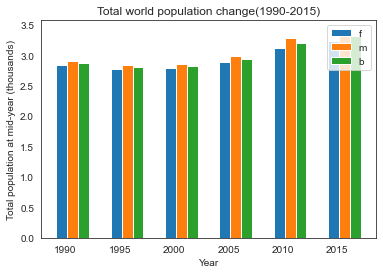

In [143]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#compare total population migrant percentage in world through out the years



#set x values and three bar values
w=0.2
x=["1990","1995","2000","2005","2010","2015"]
#y=[2000000,3000000,4000000,5000000,600000,7000000,800000]
f=[2.83474,2.775658,2.788169,2.887645,3.117222,3.228342]
m=[2.91143,2.831583,2.849206,2.979124,3.28034,3.4019]
b=[2.87331,2.803806,2.818899,2.933739,3.199467,3.315888]


#arange bar settings
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
plt.bar(bar1,f,w,label="f")
plt.bar(bar2,m,w,label="m")
plt.bar(bar3,b,w,label="b")

#label the x and y axis
plt.xlabel("Year")
plt.ylabel("Total population at mid-year (thousands)")
plt.xticks(bar1+w/3,x,)
plt.legend()
plt.title("Total world population change(1990-2015)")
plt.show()

In [158]:
nWorldDf = WorldDf[(WorldDf['Gender'] == 'f')|(WorldDf['Gender'] == 'm')] 
nWorldDf.head(30)

,Regions,Country Code,International migrant stock as a percentage of the total population,Gender,Year
6,WORLD,900,2.91143,m,1990
7,WORLD,900,2.831583,m,1995
8,WORLD,900,2.849206,m,2000
9,WORLD,900,2.979124,m,2005
10,WORLD,900,3.280341,m,2010
11,WORLD,900,3.4019,m,2015
12,WORLD,900,2.83474,f,1990
13,WORLD,900,2.775658,f,1995
14,WORLD,900,2.788169,f,2000
15,WORLD,900,2.887645,f,2005


<AxesSubplot:title={'center':'Line plots showing change in migrant stock (percentage) by gender'}, xlabel='Year', ylabel='Age'>

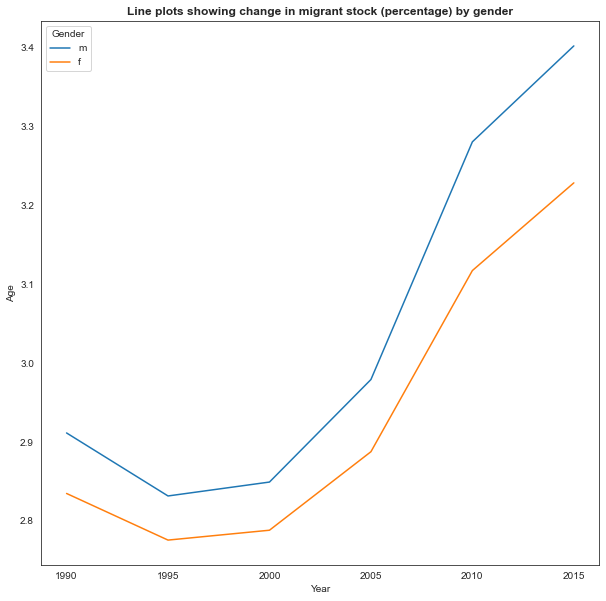

In [161]:
#line plot showing the change of migrant stock percentage for male and female (1990-2015)

sns.set_style('white')
f, ax = plt.subplots(1, 1, figsize=(10,10))


ax.set_title('Line plots showing change in migrant stock (percentage) by gender',fontweight="bold")
ax.set_ylabel('Age')
sns.lineplot(y="International migrant stock as a percentage of the total population", x="Year", hue = "Gender", estimator = "mean", ci=None, data=nWorldDf, ax=ax)




In [146]:
#sort top 10 countreis with most migrant stock percentage throughout the years for females
femaleCountryDf = CountryDf[(CountryDf['Gender']  == 'f')]

femaleCountryDf = femaleCountryDf.drop('Country Code', axis=1)
femaleCountryDf = femaleCountryDf.drop('Gender', axis=1)

femaleCountryDf=femaleCountryDf.pivot(index='Countries', columns='Year', values='International migrant stock as a percentage of the total population')

femaleCountryDf = femaleCountryDf.apply (pd.to_numeric, errors='coerce')
femaleCountryDf = femaleCountryDf.dropna()

femaleCountryDf['mean'] = femaleCountryDf.mean(axis=1)

femaleCountryDf = femaleCountryDf.sort_values(by=['mean'], ascending=False)

femaleCountryDf.reset_index(inplace=True)

#femaleCountryDf.head(50)



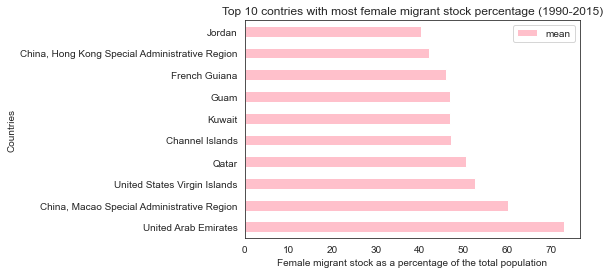

In [162]:
top10femaleCountryDf = femaleCountryDf.head(10)
top10femaleCountryDf.plot.barh('Countries','mean',color=['pink'])

#top10femaleCountryDf.plot.barh(color={"mean": "red"})
plt.xlabel("Female migrant stock as a percentage of the total population")
plt.ylabel("Countries")
plt.legend()
plt.title("Top 10 contries with most female migrant stock percentage (1990-2015)")
plt.show()
     

In [125]:
##sort top 10 countreis with most migrant stock percentage throughout the years for males
maleCountryDf = CountryDf[(CountryDf['Gender']  == 'm')]

maleCountryDf = maleCountryDf.drop('Country Code', axis=1)
maleCountryDf = maleCountryDf.drop('Gender', axis=1)

maleCountryDf=maleCountryDf.pivot(index='Countries', columns='Year', values='International migrant stock as a percentage of the total population')

maleCountryDf = maleCountryDf.apply (pd.to_numeric, errors='coerce')
maleCountryDf = maleCountryDf.dropna()

maleCountryDf['mean'] = maleCountryDf.mean(axis=1)

maleCountryDf = maleCountryDf.sort_values(by=['mean'], ascending=False)

maleCountryDf.reset_index(inplace=True)

#maleCountryDf.head(50)

Text(0.5, 1.0, 'Top 10 contries with most male migrant stock percentage (1990-2015)')

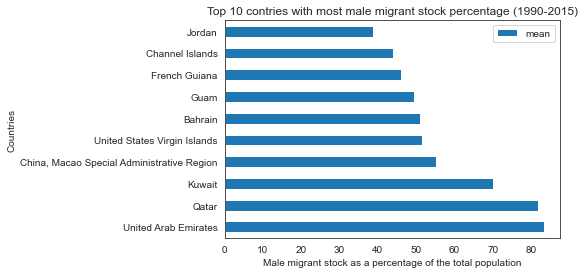

In [163]:
top10maleCountryDf = maleCountryDf.head(10)
top10maleCountryDf.plot.barh('Countries','mean')
plt.xlabel("Male migrant stock as a percentage of the total population")
plt.title("Top 10 contries with most male migrant stock percentage (1990-2015)")